# Introduction to the BANK Raw Dataset
The **Bank Marketing Dataset** contains data from a series of direct marketing campaigns conducted by a **Portuguese banking institution. The campaigns, primarily carried out via phone calls, aimed to convince clients to subscribe to a term deposit product.

This dataset includes **client demographic information**, **financial details**, and **campaign-related attributes**, making it suitable for data cleaning, exploratory data analysis (EDA), feature engineering, and predictive modeling.

* **Source**: UCI Machine Learning Repository / Kaggle
*	**Problem Type** : Binary Classification
*	**Objective** : Predict whether a client will subscribe to a term deposit (y = “yes” or “no”).

###  **Overview of the Dataset**

* **Rows**: 11,162 customers
* **Columns**: 17 features
* **File type**: CSV








### Dataset Features Description

| Column            | Type         | Description |
|-------------------|--------------|-------------|
| *age*           | Numeric      | Age of the client. |
| *job*           | Categorical  | Type of job (e.g., admin, technician, services, etc.). |
| *marital*       | Categorical  | Marital status (married, single, divorced, unknown). |
| *education*     | Categorical  | Education level (primary, secondary, tertiary, unknown). |
| *default*       | Categorical  | Has credit in default? (yes, no, unknown). |
| *balance*       | Numeric      | Average yearly account balance (in euros). |
| *housing*       | Categorical  | Has a housing loan? (yes, no, unknown). |
| *loan*          | Categorical  | Has a personal loan? (yes, no, unknown). |
| *contact*       | Categorical  | Contact communication type (cellular, telephone). |
| *day*           | Numeric      | Last contact day of the month. |
| *month*         | Categorical  | Last contact month of the year. |
| *duration*      | Numeric      | Duration of the last contact in seconds. (Should be excluded for realistic prediction to avoid data leakage) |
| *campaign*      | Numeric      | Number of contacts during this campaign for the client. |
| *pdays*         | Numeric      | Number of days since last contact from a previous campaign (999 means not previously contacted). |
| *previous*      | Numeric      | Number of contacts before this campaign. |
| *poutcome*      | Categorical  | Outcome of the previous marketing campaign (success, failure, other). |
| *y*             | Categorical  | Target variable — has the client subscribed to a term deposit? (yes, no). |


### What’s the Issue?

The **raw dataset** is not analysis-ready. It contains **dirty, inconsistent, and mixed-format data**, which must be cleaned and structured before it can be used for any kind of statistical analysis, machine learning, or dashboarding.

### **Objective**

> To **clean,preprocess and Predict whether a client will subscribe to a term deposit (y = “yes” or “no”)** the `bank dataset for project.csv` dataset so that it becomes a tidy, consistent, and analysis-ready dataset.


# **STEP 1**

#### **Data Ingestion**: This is the process of loading the data into the environment where the wok will be carried out.

In [1]:

import pandas as pd

# My data is loaded here using the pandas library and saved with the name df. 
# To access any info in my data, the name 'df' must be referred to
df =pd.read_csv('bank dataset for project.csv')

In [2]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
# From the above displayed data, we can see that the rows are not completely displayed.
# For this to be possible, using pandas, I will write a few lines of code for the rows to be displayed completely without restrictions


pd.set_option('display.max_rows', None)


# This code has to be used with caution. This is because depending on the dimension of the data, it could slow down a bit.
# There is a way around it and it is to use `data.head()` specifying the number of rows inside the bracket.
# This would limit the result to the specified number in the bracker and tends to run faster

In [4]:
# When i call the df name in this manner, it limits the result that will be printed.

df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [5]:
# The duty the code below has is to print all columns and the number of null values each column has.
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
# This help to show all the data information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
# It is important to check out for duplicates in a data. The reason is duplicates promotes inaccuracy.
# It suggest zero record of duplicate 
df.duplicated().sum()

0

# Data Cleaning


##### Data cleaning is the process of processing the data to be usable. There are several steps to clean data. Depending on the issues of the data, the following can be part of the cleaning process:

- Taking down null values

- Changing the data type to the right data type

- Dropping irrelevant columns

- Dealing with outliers

- Dropping duplicated rows, etc


##### Before a deep cleaning takes place in the data, one must refer to the problem statement in order to know the columns that should be taken out of the data.

In [8]:
# dropping irrelevant columns
# The columns below are not needed for the analysis I am about to perform.


df.drop(columns=['duration'], inplace=True)

In [9]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


In [10]:
# The duty the code below has is to print all columns and the number of null values each column has.
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [11]:
df.shape

(11162, 16)

In [12]:
# Handling unknown value 
# Replacing 'unknown' with NAN

import numpy as np

df.replace('unknown', np.nan,inplace=True)

# what am simple saying is where ever you see 'unknown' use NAN.

In [13]:
df.head(30)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,NaN,5,may,1,-1,0,NaN,yes
1,56,admin.,married,secondary,no,45,no,no,NaN,5,may,1,-1,0,NaN,yes
2,41,technician,married,secondary,no,1270,yes,no,NaN,5,may,1,-1,0,NaN,yes
3,55,services,married,secondary,no,2476,yes,no,NaN,5,may,1,-1,0,NaN,yes
4,54,admin.,married,tertiary,no,184,no,no,NaN,5,may,2,-1,0,NaN,yes
5,42,management,single,tertiary,no,0,yes,yes,NaN,5,may,2,-1,0,NaN,yes
6,56,management,married,tertiary,no,830,yes,yes,NaN,6,may,1,-1,0,NaN,yes
7,60,retired,divorced,secondary,no,545,yes,no,NaN,6,may,1,-1,0,NaN,yes
8,37,technician,married,secondary,no,1,yes,no,NaN,6,may,1,-1,0,NaN,yes
9,28,services,single,secondary,no,5090,yes,no,NaN,6,may,3,-1,0,NaN,yes


In [14]:
df.isnull().sum()

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

#### If I drop the rows with NaN values, I’ll lose 8,326 rows. On the other hand, if I drop by columns, I’ll remove 4 columns that contain NaN values. I’ll go with dropping rows instead, since some of the column values are still needed for visualization and modeling.

In [15]:
## Dropping the row with NAN value

df = df.dropna()

In [ ]:
## Dropping the columns that has nun values

dr = df.dropna(axis=1)

In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
890,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,1,166,1,other,yes
891,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,1,91,4,failure,yes
951,53,retired,married,tertiary,no,2269,no,no,cellular,17,nov,2,150,1,success,yes
952,37,technician,married,secondary,no,5115,yes,no,cellular,17,nov,2,171,4,failure,yes
953,45,entrepreneur,married,secondary,no,781,no,yes,cellular,17,nov,2,126,2,failure,yes


In [17]:
# The duty the code below has is to print all columns and the number of null values each column has.
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [18]:
df.shape

(2675, 16)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2675 entries, 890 to 11160
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        2675 non-null   int64 
 1   job        2675 non-null   object
 2   marital    2675 non-null   object
 3   education  2675 non-null   object
 4   default    2675 non-null   object
 5   balance    2675 non-null   int64 
 6   housing    2675 non-null   object
 7   loan       2675 non-null   object
 8   contact    2675 non-null   object
 9   day        2675 non-null   int64 
 10  month      2675 non-null   object
 11  campaign   2675 non-null   int64 
 12  pdays      2675 non-null   int64 
 13  previous   2675 non-null   int64 
 14  poutcome   2675 non-null   object
 15  deposit    2675 non-null   object
dtypes: int64(6), object(10)
memory usage: 355.3+ KB


In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
890,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,1,166,1,other,yes
891,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,1,91,4,failure,yes
951,53,retired,married,tertiary,no,2269,no,no,cellular,17,nov,2,150,1,success,yes
952,37,technician,married,secondary,no,5115,yes,no,cellular,17,nov,2,171,4,failure,yes
953,45,entrepreneur,married,secondary,no,781,no,yes,cellular,17,nov,2,126,2,failure,yes


In [21]:
df.to_csv("Cleaned_capstone_bank_data.csv",index=False)


## 📊 Data Visualization and EDA: A Key Tool in Data Analysis

#### 🔍 What is Data Visualization?

**Data Visualization** is the graphical representation of information and data. By using visual elements like **charts, graphs, and maps**, data visualization tools make it easier to see and understand **trends, outliers, patterns, and relationships** within data.

Instead of looking at hundreds or thousands of rows in a dataset, data visualization **translates complex data into a visual context** that is easier to understand and interpret.

---

### 🌟 Why is Data Visualization Important?

1. ### ✅ **Simplifies Complex Data**

   * Large and complex datasets can be overwhelming when viewed as raw numbers.
   * Visualization helps break down that complexity into **digestible visuals**, making it easier for both technical and non-technical stakeholders to understand.

2. ### 👀 **Reveals Hidden Patterns**

   * Charts can uncover patterns that are hard to detect from raw data, such as:

     * Trends over time (line plots)
     * Clusters (scatter plots)
     * Distributions (histograms, boxplots)
     * Comparisons (bar plots)

3. ### 🚨 **Helps Spot Errors or Outliers**

   * Visualization can quickly show where data might be inaccurate or where **anomalies** exist — such as negative ages, unrealistic salaries, or missing values grouped in specific fields.

4. ### 🧠 **Enhances Memory and Understanding**

   * Humans are visual creatures. We tend to **remember what we see better than what we read**. Good visuals improve learning and decision-making.

5. ### 📢 **Effective Communication Tool**

   * Data visualizations are often the best way to **present findings** in reports, dashboards, and presentations. They speak more clearly than long explanations or tables of numbers.

---

### 🔍 Data Visualization as Part of EDA (Exploratory Data Analysis)

EDA is the process of analyzing datasets to **summarize their main characteristics**, often using visual methods.

In this context, **data visualization is not just useful — it's essential**. Here's how it fits in:

| EDA Activity                   | Visualization Example    | Purpose                                  |
| ------------------------------ | ------------------------ | ---------------------------------------- |
| Understanding Distributions    | Histograms, KDE plots    | Know how data is spread (e.g., skewness) |
| Spotting Outliers              | Box plots, scatter plots | Identify unusual or extreme values       |
| Detecting Trends Over Time     | Line charts              | Observe changes or cycles                |
| Comparing Categories           | Bar plots, stacked plots | Compare different groups or labels       |
| Examining Relationships        | Scatter plots, heatmaps  | Reveal correlations and patterns         |
| Checking Missing Data Patterns | Matrix plots, heatmaps   | Visualize where and how data is missing  |

---

### 🧰 Common Visualization Tools & Libraries

* **Python**: `matplotlib`, `seaborn`, `plotly`, `pandas` built-in plots
* **R**: `ggplot2`
* **BI Tools**: Tableau, Power BI
* **Spreadsheets**: Excel, Google Sheets (basic plotting)
* **Web Tools**: D3.js, Google Charts

---

### Conclusion

In summary, **data visualization is more than just creating pretty graphs**. It is a **powerful method to explore, understand, and communicate data** — especially in the early stages of any data project. As part of EDA, it acts as a **diagnostic tool** that helps you ask better questions and make smarter decisions.

Without it, insights remain hidden, mistakes go unnoticed, and communication becomes more difficult.



In [22]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
890,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,1,166,1,other,yes
891,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,1,91,4,failure,yes
951,53,retired,married,tertiary,no,2269,no,no,cellular,17,nov,2,150,1,success,yes
952,37,technician,married,secondary,no,5115,yes,no,cellular,17,nov,2,171,4,failure,yes
953,45,entrepreneur,married,secondary,no,781,no,yes,cellular,17,nov,2,126,2,failure,yes


# **1. Histogram to visualize the bank marketing.**

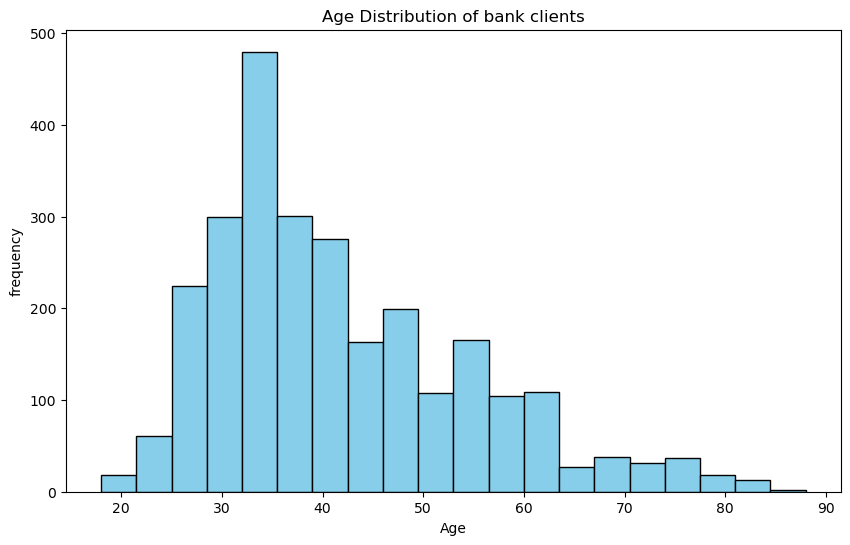

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram for 'age'
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of bank clients')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

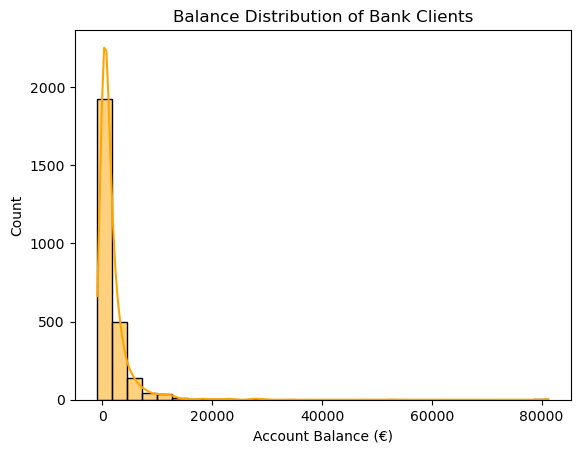

In [24]:
# Example: Histogram for 'balance'


sns.histplot(df['balance'], bins=30, kde=True, color='orange')
plt.title('Balance Distribution of Bank Clients')
plt.xlabel('Account Balance (€)')
plt.ylabel('Count')
plt.show()

In [25]:
# importing warning is just to avoid showing the futurewarning

import warnings
warnings.filterwarnings('ignore')

# **1. Targeting the variable distribution(Deposit Subscription)**

#### Purpose is to check the class inmbalance

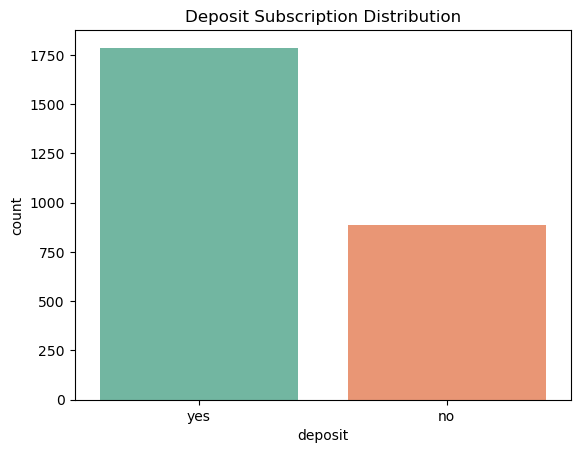

In [26]:
sns.countplot(x='deposit', data=df, palette='Set2')
plt.title('Deposit Subscription Distribution')
plt.show()

# **Insight**: This bar chart shows how many clients subscribed (yes) vs. not (no). This helps you see if the dataset is balanced.


# **2. Age Distribution**
####  Purpose is to see which age group dominate the dataset.

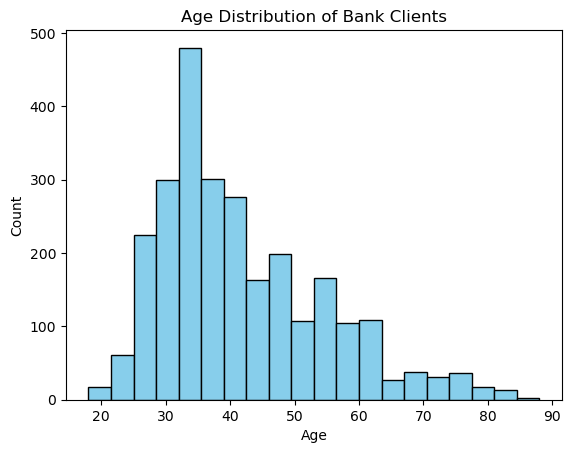

In [27]:
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Bank Clients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# **Insight: This chart is to identifies the most common age ranges of clients and possible target age groups.**

# **3. Job Type vs Subscription**

#### Purposeis to find which professions have higher subscription rates.

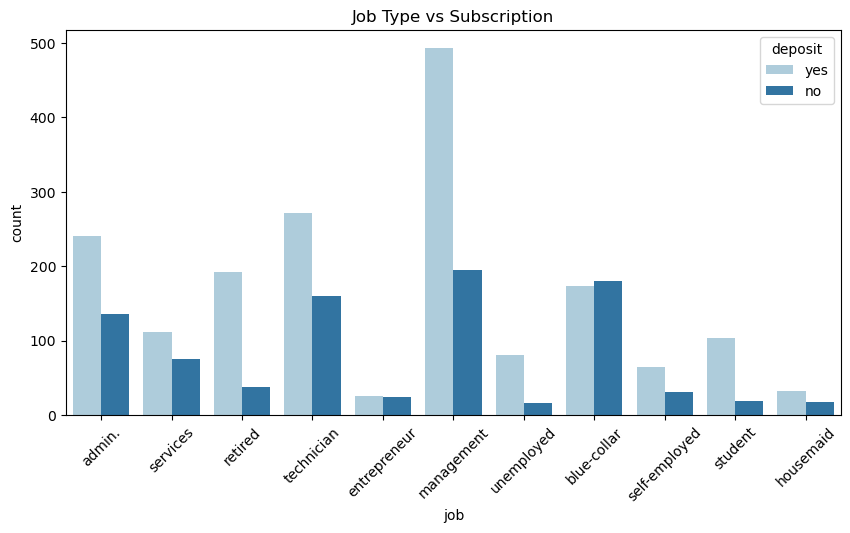

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='job', hue='deposit', data=df, palette='Paired')
plt.xticks(rotation=45)
plt.title('Job Type vs Subscription')
plt.show()

# **Insight**: This chart reveals which job categories respond better to marketing campaigns

# **4. Education Level vs Subscription**

#### Purpose is to See if education influences deposits.

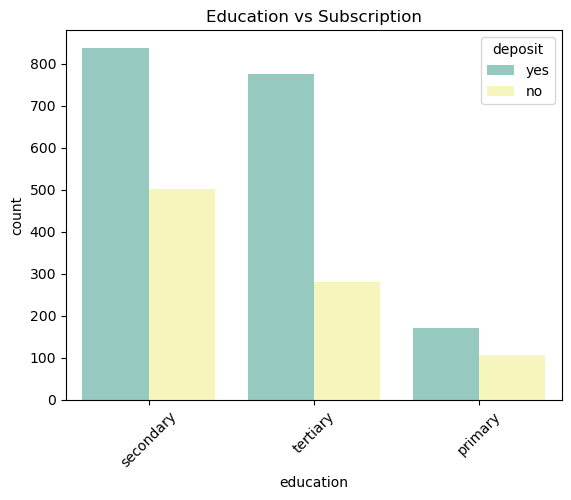

In [29]:
sns.countplot(x='education', hue='deposit', data=df, palette='Set3')
plt.xticks(rotation=45)
plt.title('Education vs Subscription')
plt.show()

# **Insight**: Higher or lower education levels may impact subscription likelihood.

# **5. Marital Status vs Subscription**
#### Purpose is to check if marital status impacts deposits.

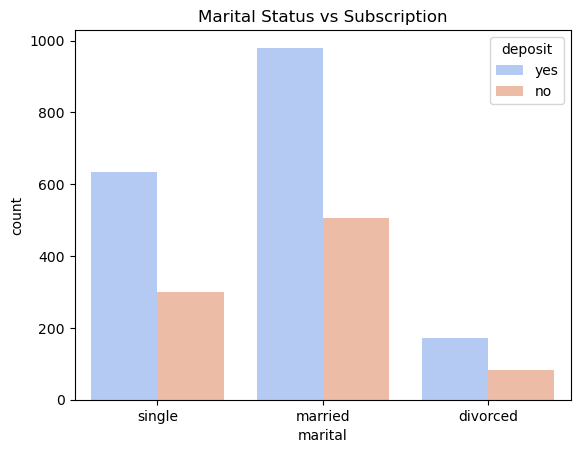

In [30]:
sns.countplot(x='marital', hue='deposit', data=df, palette='coolwarm')
plt.title('Marital Status vs Subscription')
plt.show()

# **Insight**: This chart helps identify if married, single, or divorced clients are more likely to subscribe.

# **6. Balance Distribution by Subscription**

#### Purpose is to see how account balance affects subscriptions.

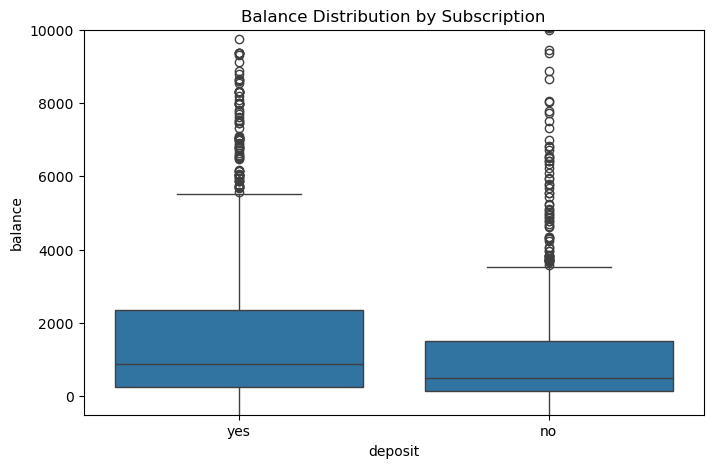

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x='deposit', y='balance', data=df)
plt.ylim(-500, 10000)  # to avoid extreme outliers dominating
plt.title('Balance Distribution by Subscription')
plt.show()

# **Insight** : This chart shows that the higher balances may indicate greater likelihood of subscribing.

# **7. Month vs Subscription**

#### Purpose is to find seasonal patterns

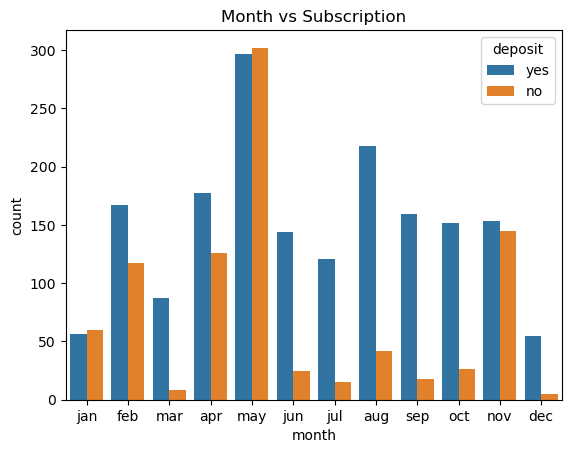

In [32]:
sns.countplot(x='month', hue='deposit', data=df, order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.title('Month vs Subscription')
plt.show()

# **Insight**:This chart shows some certain months may have higher campaign success rates.

# **8. Housing Loan vs Subscription**

#### Purpose is to check if having a housing loan affects deposits.

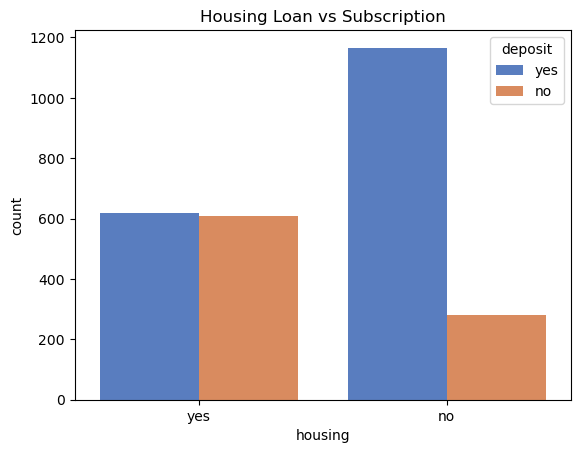

In [33]:
sns.countplot(x='housing', hue='deposit', data=df, palette='muted')
plt.title('Housing Loan vs Subscription')
plt.show()

# **Insight**:This chart may shows that debt reduces willingness to invest.

# **9. Number of Contacts in Campaign**

#### Purpose is to see effect of repeated contacts.

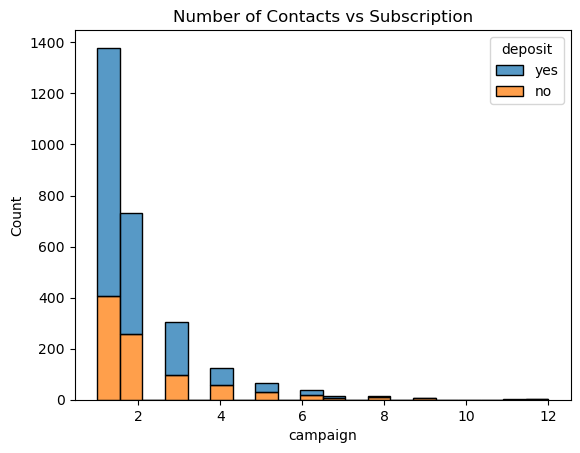

In [34]:
sns.histplot(data=df, x='campaign', hue='deposit', multiple='stack', bins=20)
plt.title('Number of Contacts vs Subscription')
plt.show()

# **Insight** :This shows if too many contacts reduce success.

# **MACHINE LEARNING** : This is the subset of artificial intelligence (Ai) that focuses on enablig system to learn from data without explicit programming.
